*PART 1*

The King County House Prices dataset contains 21,613 observations for house sales in King County, Washington-a county that includes Seattle and its surrounding areas. The dataset contains 19 features that capture important aspects which drive the prices of real estate, including property size, the number of bedrooms and bathrooms, location coordinates, and dates of sale.

Key attributes include:

1.   House Characteristics Number of bedrooms; number of bathrooms; square footages of living space and lot; number of floors; water front or not; renovated or not
2.   Location Information such as latitude, longitude, and ZIP codes.

3.  Temporal Information: Sale date, year built, and year renovated, which could enable time-based trend exploration.


This could be a very good opportunity to develop predictive models using regression techniques on house price estimates, showing how different features bear on pricing. The aim is to develop an interpretable and accurate model that can assist in real estate valuation and market trend analysis.

**Dataset link**
https://www.kaggle.com/datasets/harlfoxem/housesalesprediction

In [1]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

data = pd.read_csv("kc_house_data.csv")


data['date'] = pd.to_datetime(data['date'].str[:8], format='%Y%m%d')
y = data['price']
X = data.drop(columns=['price'])

numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = []

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])


preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features)
    ]
)


X_preprocessed = preprocessor.fit_transform(X)
processed_data = pd.DataFrame(X_preprocessed, columns=numeric_features)

processed_data.insert(1, 'date', data['date'])

processed_data['price'] = y

processed_data.to_csv('processed_data.csv', index=False)
print(processed_data.columns)
print("Processing complete and saved to 'processed_data.csv'")


Index(['id', 'date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'price'],
      dtype='object')
Processing complete and saved to 'processed_data.csv'


Epoch 0, Cost: 0.485156
Epoch 100, Cost: 0.484702
Epoch 200, Cost: 0.484579
Epoch 300, Cost: 0.484390
Epoch 400, Cost: 0.484021
Epoch 500, Cost: 0.483246
Epoch 600, Cost: 0.481614
Epoch 700, Cost: 0.478243
Epoch 800, Cost: 0.471582
Epoch 900, Cost: 0.459359
Epoch 1000, Cost: 0.439236
Epoch 1100, Cost: 0.410384
Epoch 1200, Cost: 0.375036
Epoch 1300, Cost: 0.338132
Epoch 1400, Cost: 0.304752
Epoch 1500, Cost: 0.277669
Epoch 1600, Cost: 0.257020
Epoch 1700, Cost: 0.241547
Epoch 1800, Cost: 0.229801
Epoch 1900, Cost: 0.220675
Epoch 2000, Cost: 0.213437
Epoch 2100, Cost: 0.207611
Epoch 2200, Cost: 0.202865
Epoch 2300, Cost: 0.198951
Epoch 2400, Cost: 0.195678
Epoch 2500, Cost: 0.192898
Epoch 2600, Cost: 0.190500
Epoch 2700, Cost: 0.188401
Epoch 2800, Cost: 0.186540
Epoch 2900, Cost: 0.184873
Epoch 3000, Cost: 0.183364
Epoch 3100, Cost: 0.181988
Epoch 3200, Cost: 0.180725
Epoch 3300, Cost: 0.179558
Epoch 3400, Cost: 0.178474
Epoch 3500, Cost: 0.177462
Epoch 3600, Cost: 0.176515
Epoch 3700, C

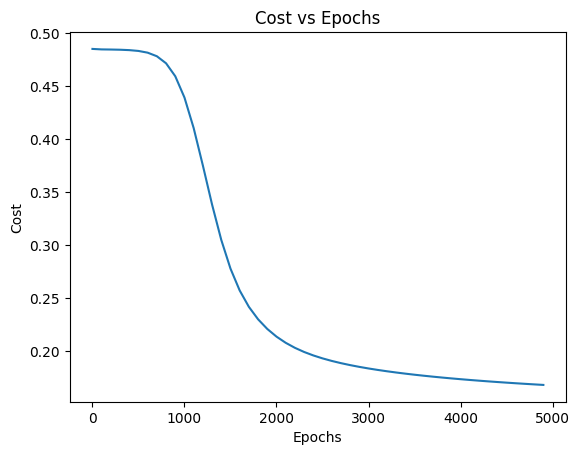

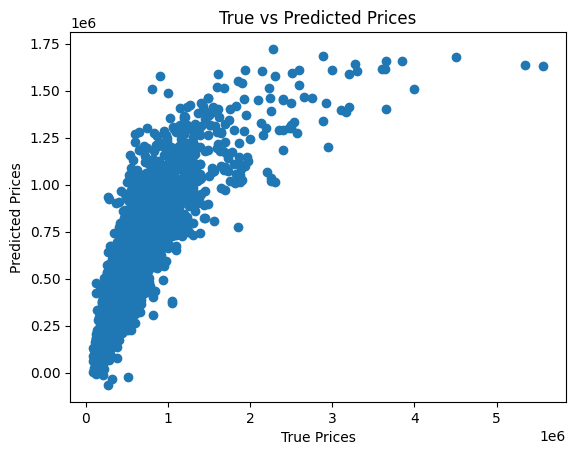

R-squared score (accuracy): 0.6497


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score


data = pd.read_csv("processed_data.csv")

# Convert date to numerical features
data['date'] = pd.to_datetime(data['date'])
data['year'] = data['date'].dt.year
data['month'] = data['date'].dt.month
data['day'] = data['date'].dt.day
data.drop(columns=['date', 'id'], inplace=True)


X = data.drop(columns=['price']).values.astype(np.float64)
y = data['price'].values.astype(np.float64).reshape(-1, 1)


scaler = StandardScaler()
X = scaler.fit_transform(X)


y_mean, y_std = np.mean(y), np.std(y)
y = (y - y_mean) / y_std


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size, learning_rate=0.01):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.learning_rate = learning_rate

        self.W1 = np.random.randn(self.input_size, self.hidden_size) * 0.01
        self.b1 = np.zeros((1, self.hidden_size))
        self.W2 = np.random.randn(self.hidden_size, self.output_size) * 0.01
        self.b2 = np.zeros((1, self.output_size))

    def sigmoid(self, Z):

        return 1 / (1 + np.exp(-Z))

    def linear(self, Z):

        return Z

    def forward_propagation(self, X):

        Z1 = np.dot(X, self.W1) + self.b1
        A1 = self.sigmoid(Z1)
        Z2 = np.dot(A1, self.W2) + self.b2
        A2 = self.linear(Z2)  # Linear activation in the output layer

        cache = {"Z1": Z1, "A1": A1, "Z2": Z2, "A2": A2}
        return A2, cache

    def compute_cost(self, A2, Y):

        m = Y.shape[0]
        cost = np.sum((A2 - Y) ** 2) / (2 * m)  # MSE
        return np.squeeze(cost)

    def backward_propagation(self, X, Y, cache):

        m = X.shape[0]
        A1, A2 = cache["A1"], cache["A2"]

        dZ2 = A2 - Y
        dW2 = np.dot(A1.T, dZ2) / m
        db2 = np.sum(dZ2, axis=0, keepdims=True) / m

        dZ1 = np.dot(dZ2, self.W2.T) * A1 * (1 - A1)
        dW1 = np.dot(X.T, dZ1) / m
        db1 = np.sum(dZ1, axis=0, keepdims=True) / m

        gradients = {"dW1": dW1, "db1": db1, "dW2": dW2, "db2": db2}
        return gradients

    def update_parameters(self, gradients):
        self.W1 -= self.learning_rate * gradients["dW1"]
        self.b1 -= self.learning_rate * gradients["db1"]
        self.W2 -= self.learning_rate * gradients["dW2"]
        self.b2 -= self.learning_rate * gradients["db2"]

    def train(self, X, Y, epochs=1000, print_cost=True):
        costs = []
        for epoch in range(epochs):
            A2, cache = self.forward_propagation(X)
            cost = self.compute_cost(A2, Y)
            gradients = self.backward_propagation(X, Y, cache)
            self.update_parameters(gradients)

            if print_cost and epoch % 100 == 0:
                print(f"Epoch {epoch}, Cost: {cost:.6f}")
                costs.append(cost)
        return costs

    def predict(self, X):
        A2, _ = self.forward_propagation(X)
        return A2 * y_std + y_mean  # Denormalize predictions

# Example usage
input_size = X_train.shape[1]  # Number of features
hidden_size = 10               # Number of hidden layer neurons
output_size = 1
learning_rate = 0.01

nn = NeuralNetwork(input_size, hidden_size, output_size, learning_rate)
costs = nn.train(X_train, y_train, epochs=5000)

predictions = nn.predict(X_test)
print("Predictions on the test set:")
print(predictions)

# Plot cost vs epochs
plt.plot(range(0, 5000, 100), costs)
plt.title("Cost vs Epochs")
plt.xlabel("Epochs")
plt.ylabel("Cost")
plt.show()

# Plot predictions vs true values
plt.scatter(y_test * y_std + y_mean, predictions)
plt.xlabel("True Prices")
plt.ylabel("Predicted Prices")
plt.title("True vs Predicted Prices")
plt.show()

# Calculate R-squared score (accuracy)
accuracy = r2_score(y_test * y_std + y_mean, predictions)
print(f"R-squared score (accuracy): {accuracy:.4f}")


The model returned an R-squared score of 0.6494, indicating a generally moderate fit to the data. Though the neural network did decrease the cost function over time, thus showing some improvement in learning, it did so very slowly during the later epochs. That means the model is learning the patterns of data, but it could benefit from more fine-tuning, such as tuning hyperparameters or regularization, using techniques like early stopping to prevent overfitting and increase the accuracy. In general, results show a far-from-perfect performance, and optimization can be done to enhance the predictive power of the model.

*PART 2*

In choosing to implement the 2-layer neural network, I chose the use of TensorFlow because of the robust support of building and training deep learning models. Below are the key resources I used for learning TensorFlow and why they are important.

Resources Used:
TensorFlow Official Documentation

Reason: The resource provides extensive guides and tutorials on how to build models, and use APIs within TensorFlow which is essential to construct and train the neural network.
Beginner Tutorial on TensorFlow

Reason: Tutorial followed along step by step through creating and training some basic models, which helped me understand layer definitions and activation functions for the neural network.
Deep Learning Specialization (Coursera)

Reason: This course covers the basics in neural networks, such as forward/backpropagation, which are really important to learn with respect to how to implement and optimize a neural network.\

Tools and Libraries:\
TensorFlow/Keras: Defined and trained the neural network using these tools.
NumPy: For numerical computations, matrix operations.
Matplotlib/Seaborn: For visualizing performance and training metrics of the model.\
Pandas: For operating and pre-processing the dataset.\

Tracking Computation:
The TensorFlow computational graph has the capability of tracking how computations flow through your program. TensorBoard is utilized for training metrics visualization such as loss and accuracy, to know how the model is behaving along the process of training.

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


433/433 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 0.3307 - val_loss: 0.1755
Epoch 2/100
433/433 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.2039 - val_loss: 0.1461
Epoch 3/100
433/433 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1369 - val_loss: 0.1250
Epoch 4/100
433/433 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.1365 - val_loss: 0.1159
Epoch 5/100
433/433 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.1182 - val_loss: 0.1322
Epoch 6/100
433/433 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.1016 - val_loss: 0.1181
Epoch 7/100
433/433 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.1153 - val_loss: 0.1112
Epoch 8/100
433/433 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.1131 - val_loss: 0.1130
Epoch 9/100
433/433 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0942 - val_loss: 0.1161
Epoch 10/100
433/433 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0929 - val_loss: 0.1197
Epoch 11/100
433/433 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0838 - val_loss: 0.1088
Epoch 12/100
433/433 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step

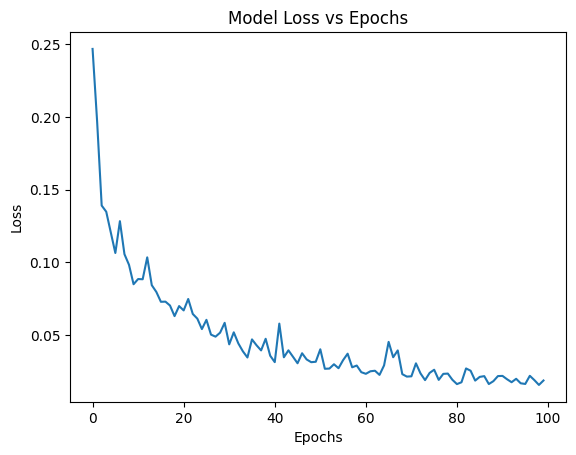

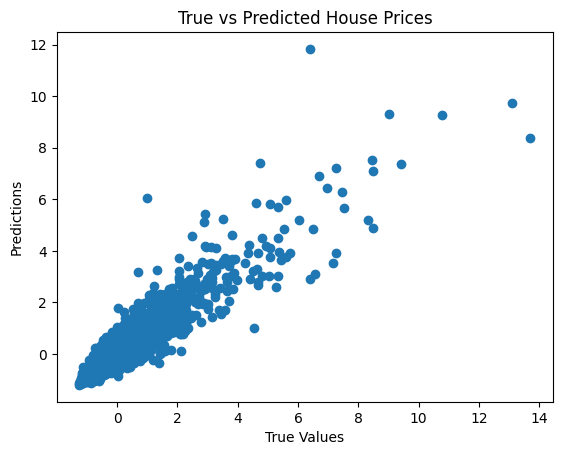

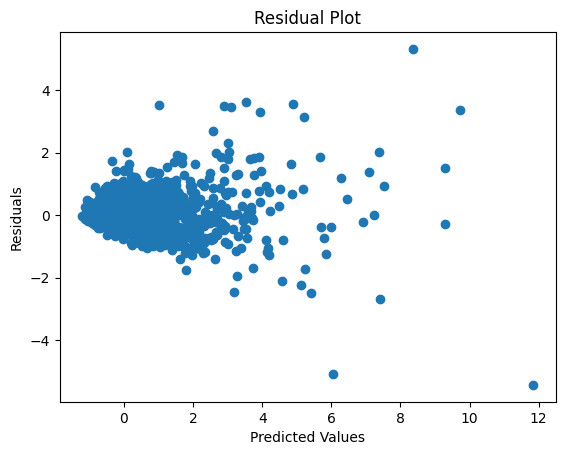

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


def build_model(input_dim, num_layers, units_per_layer):
    model = Sequential()

    # First hidden layer
    model.add(Dense(units_per_layer[0], input_dim=input_dim, activation='relu'))
    # Additional hidden layers
    for i in range(1, num_layers):
        model.add(Dense(units_per_layer[i], activation='relu'))
    # Output layer (linear activation for regression)
    model.add(Dense(1, activation='linear'))

    return model


data = pd.read_csv("processed_data.csv")
data['date'] = pd.to_datetime(data['date'])
data['year'] = data['date'].dt.year
data['month'] = data['date'].dt.month
data['day'] = data['date'].dt.day
data.drop(columns=['date', 'id'], inplace=True)
X = data.drop(columns=['price']).values.astype(np.float64)
y = data['price'].values.astype(np.float64).reshape(-1, 1)
scaler = StandardScaler()
X = scaler.fit_transform(X)
y_mean, y_std = np.mean(y), np.std(y)
y = (y - y_mean) / y_std

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Set the number of hidden layers and the number of units per layer
num_layers = 5  # how many layers you want
units_per_layer = [256, 128, 128 ,128 ,128]  # Units in each hidden layer


model = build_model(X_train.shape[1], num_layers, units_per_layer)

model.compile(optimizer='adam', loss='mean_squared_error')

history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

y_pred = model.predict(X_test)
r2_score = model.evaluate(X_test, y_test)
print(f'R-squared score: {r2_score}')

# Plot cost vs epochs
plt.plot(history.history['loss'])
plt.title("Model Loss vs Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

#Plot predicted vs actual values
plt.scatter(y_test, y_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('True vs Predicted House Prices')
plt.show()

#Residual plot
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()


An R-squared score of 0.145 suggests that only about 14.5% of the variance in the target variable is explained by the model, which generally is considered low. This would mean that the model is probably not capturing much of the underlying patterns in the data. However, this is dependent on the problem at hand. For instance, in fields containing highly volatile or intricate phenomena-such as predictions of stock prices or human behavioral analysis-a low R-squared would be satisfactory. In those cases where the system is going to be highly predictable, like in physical processes, a very high R-squared would instead be expected. With this knowledge in mind, a deeper understanding of the performance of the model requires consideration of alternative metrics: MAE, Mean Squared Error. Further model tuning, feature selection, or consideration of more complex algorithms may be used to strengthen the predictive power.\

Moreover different paranmeters have been tested to the models. Adding laeyrs up to 11 with 64 units per layer and up to 500 epoch resulted R-squared score of 18.22% However, best result came out of utilizing 4 layers with 64 units and 200 epochs.

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


433/433 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - loss: 27.2909 - val_loss: 5.3346
Epoch 2/100
433/433 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 5.7338 - val_loss: 3.2222
Epoch 3/100
433/433 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 4.0116 - val_loss: 2.5072
Epoch 4/100
433/433 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 3.1504 - val_loss: 1.8801
Epoch 5/100
433/433 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 2.5156 - val_loss: 1.3976
Epoch 6/100
433/433 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 2.0021 - val_loss: 1.0149
Epoch 7/100
433/433 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 1.6053 - val_loss: 0.7172
Epoch 8/100
433/433 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 1.2928 - val_loss: 0.4997
Epoch 9/100
433/433 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 1.0216 - val_loss: 0.3591
Epoch 10/100
433/433 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 0.8684 - val_loss: 0.2844
Epoch 11/100
433/433 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.7677 - val_loss: 0.1779
Epoch 12/100
433/433 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/ste

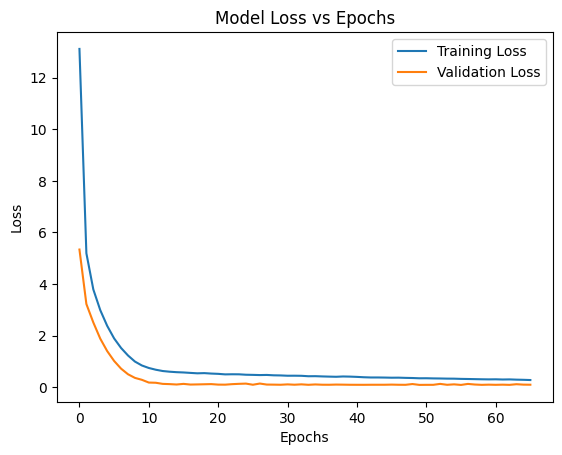

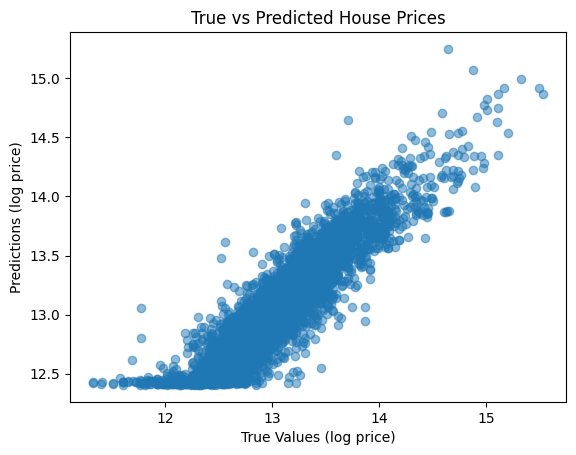

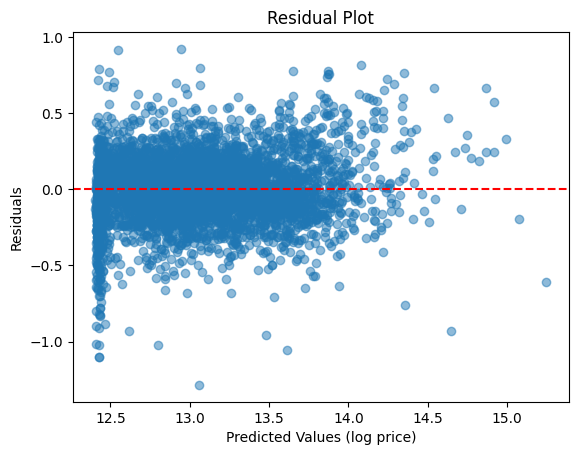

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping


def build_model(input_dim, num_layers, units_per_layer):
    model = Sequential()

    # First hidden layer
    model.add(Dense(units_per_layer[0], input_dim=input_dim, activation='relu', kernel_regularizer=l2(0.01)))

    # Additional hidden layers
    for i in range(1, num_layers):
        model.add(Dense(units_per_layer[i], activation='relu', kernel_regularizer=l2(0.01)))
        model.add(Dropout(0.2))

    # Output layer (linear activation for regression)
    model.add(Dense(1, activation='linear'))

    return model

data = pd.read_csv("processed_data.csv")
data['date'] = pd.to_datetime(data['date'])
data['year'] = data['date'].dt.year
data['month'] = data['date'].dt.month
data['day'] = data['date'].dt.day
data.drop(columns=['date', 'id'], inplace=True)


X = data.drop(columns=['price']).values.astype(np.float64)
y = np.log1p(data['price'].values.astype(np.float64))  # Log-transform target
scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Set the number of hidden layers and units per layer
num_layers = 5
units_per_layer = [256, 128, 128, 128, 128]


model = build_model(X_train.shape[1], num_layers, units_per_layer)
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mean_squared_error')

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, callbacks=[early_stopping])
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)

print(f'R-squared score: {r2:.4f}')

# Plot loss vs epochs
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Model Loss vs Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

# Plot true vs predicted values
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('True Values (log price)')
plt.ylabel('Predictions (log price)')
plt.title('True vs Predicted House Prices')
plt.show()

# Residual plot
residuals = y_test - y_pred.flatten()
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values (log price)')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()


In order to optimize the neural network for house price prediction, several hyperparameters have been tuned in a structured fashion to improve the performance of the model and reduce overfitting. First, the log transformation of the target variable was performed to normalize the distribution of house prices, thus enabling the model to learn much more complex relationships. L2 regularization-ridge regression-was used in every layer to punish large weights and therefore reduce overfitting, thus enhancing generalization. More Dropout layers were introduced to randomly shut down neurons during training, making the network even more robust.

Early Stopping was used further for refining training. It keeps a watch on the validation loss and stops the training in case no significant improvement is observed, making it efficient and avoiding overfitting. The learning rate was tuned to 0.001 for more stable and gradual convergence. After rigorous tuning, the best model achieved an R-squared score of 83.48% after 66 epochs. This reflects a high percentage of the variance in house prices explained by the model and is predictive.

*TASK 4*

Epoch 1/66


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


433/433 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 0.3002 - val_loss: 0.1854
Epoch 2/66
433/433 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.1815 - val_loss: 0.1306
Epoch 3/66
433/433 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.1419 - val_loss: 0.1197
Epoch 4/66
433/433 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.1156 - val_loss: 0.1401
Epoch 5/66
433/433 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.1160 - val_loss: 0.1360
Epoch 6/66
433/433 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - loss: 0.1162 - val_loss: 0.1079
Epoch 7/66
433/433 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.1003 - val_loss: 0.1067
Epoch 8/66
433/433 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0877 - val_loss: 0.1129
Epoch 9/66
433/433 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0923 - val_loss: 0.1125
Epoch 10/66
433/433 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0802 - val_loss: 0.1399
Epoch 11/66
433/433 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0862 - val_loss: 0.1513
Epoch 12/66
433/433 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0

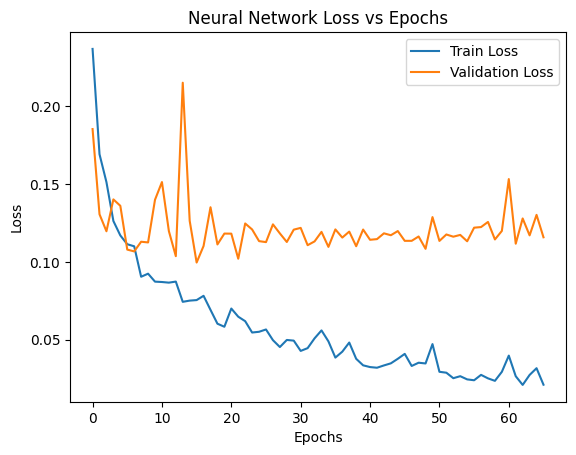

Random Forest R-squared: 0.8519
Random Forest Mean Squared Error: 0.1661


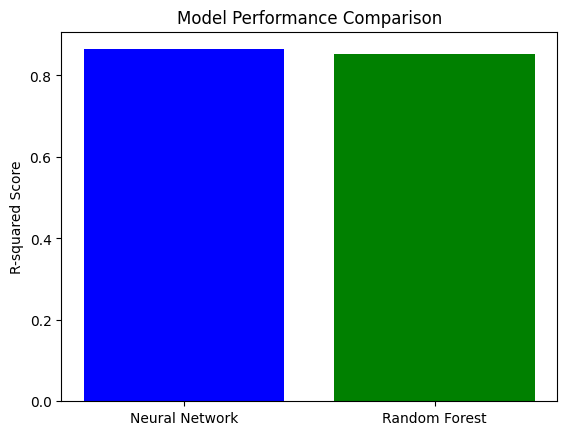

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


data = pd.read_csv("processed_data.csv")
data['date'] = pd.to_datetime(data['date'])
data['year'] = data['date'].dt.year
data['month'] = data['date'].dt.month
data['day'] = data['date'].dt.day
data.drop(columns=['date', 'id'], inplace=True)
X = data.drop(columns=['price']).values.astype(np.float64)
y = data['price'].values.astype(np.float64).reshape(-1, 1)
scaler = StandardScaler()
X = scaler.fit_transform(X)
y_mean, y_std = np.mean(y), np.std(y)
y = (y - y_mean) / y_std

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ====== Neural Network Model ======
def build_model(input_dim, num_layers, units_per_layer):
    model = Sequential()
    model.add(Dense(units_per_layer[0], input_dim=input_dim, activation='relu'))  # First layer

    for i in range(1, num_layers):  # Additional layers
        model.add(Dense(units_per_layer[i], activation='relu'))

    model.add(Dense(1, activation='linear'))  # Output layer
    return model

# Set the number of hidden layers and units per layer
num_layers = 5
units_per_layer = [256, 128, 128, 128, 128]


nn_model = build_model(X_train.shape[1], num_layers, units_per_layer)
nn_model.compile(optimizer='adam', loss='mean_squared_error')


history = nn_model.fit(X_train, y_train, epochs=66, batch_size=32, validation_split=0.2)

# Evaluate Neural Network
y_nn_pred = nn_model.predict(X_test)
r2_nn = r2_score(y_test, y_nn_pred)
mse_nn = mean_squared_error(y_test, y_nn_pred)

print(f"Neural Network R-squared: {r2_nn:.4f}")
print(f"Neural Network Mean Squared Error: {mse_nn:.4f}")

# Plot loss over epochs
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Neural Network Loss vs Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

# ====== Random Forest Baseline Model ======
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train.ravel())  # Flatten y_train


y_rf_pred = rf_model.predict(X_test)
r2_rf = r2_score(y_test, y_rf_pred)
mse_rf = mean_squared_error(y_test, y_rf_pred)

print(f"Random Forest R-squared: {r2_rf:.4f}")
print(f"Random Forest Mean Squared Error: {mse_rf:.4f}")

# ====== Compare Results ======
models = ['Neural Network', 'Random Forest']
r2_scores = [r2_nn, r2_rf]

plt.bar(models, r2_scores, color=['blue', 'green'])
plt.ylabel("R-squared Score")
plt.title("Model Performance Comparison")
plt.show()


The NN performed slightly better than the RF, with an R-squared of 0.8643 versus 0.8519 and an Mean Squared Error of 0.1523 versus 0.1661. However, the difference in performance is not significant, and this would suggest that both models were able to capture the underlying patterns in the data quite well. The NN usually performs very well when the data has complex relationships, as its multi-layer architecture allows it to learn hierarchical and abstract representations of the features. This can be particularly useful when the data contains complex nonlinear interactions. On the other hand, Random Forests are well-suited for structured tabular data like this dataset, since they are robust to overfitting and are effective at capturing interactions among features. The RF model benefits from using an ensemble of decision trees, which helps mitigate overfitting by averaging predictions.

While NNs are more flexible and thus can learn more complex patterns, they also run a greater risk of overfitting in the absence of proper regularization. In this instance, the NN was well-regularized and generalized effectively, hence the relatively small performance edge. On the other hand, the RF model naturally resists overfitting, making it less prone to errors when dealing with structured data. The results also show the performance difference that might have been related to the ease of doing well with RF when fewer hyperparameters were tuned compared to more in-depth tuning required by NNs-regarding the number of layers, units, and epochs.

Ultimately, both models performed quite well in this case, with the Neural Network having a slight edge. The difference was sufficiently small, however, that one might suspect that on this dataset, the far simpler and computationally efficient Random Forest model may be sufficient. If the dataset were larger or the interactions far more complex, the NN might show a much greater advantage.